In [ ]:
import import_ipynb
%run CICIDS_2019_data_preprocessing.ipynb


Validation Accuracy: 0.999024
Test Accuracy: 0.998917
RF_accuracy: 0.998917


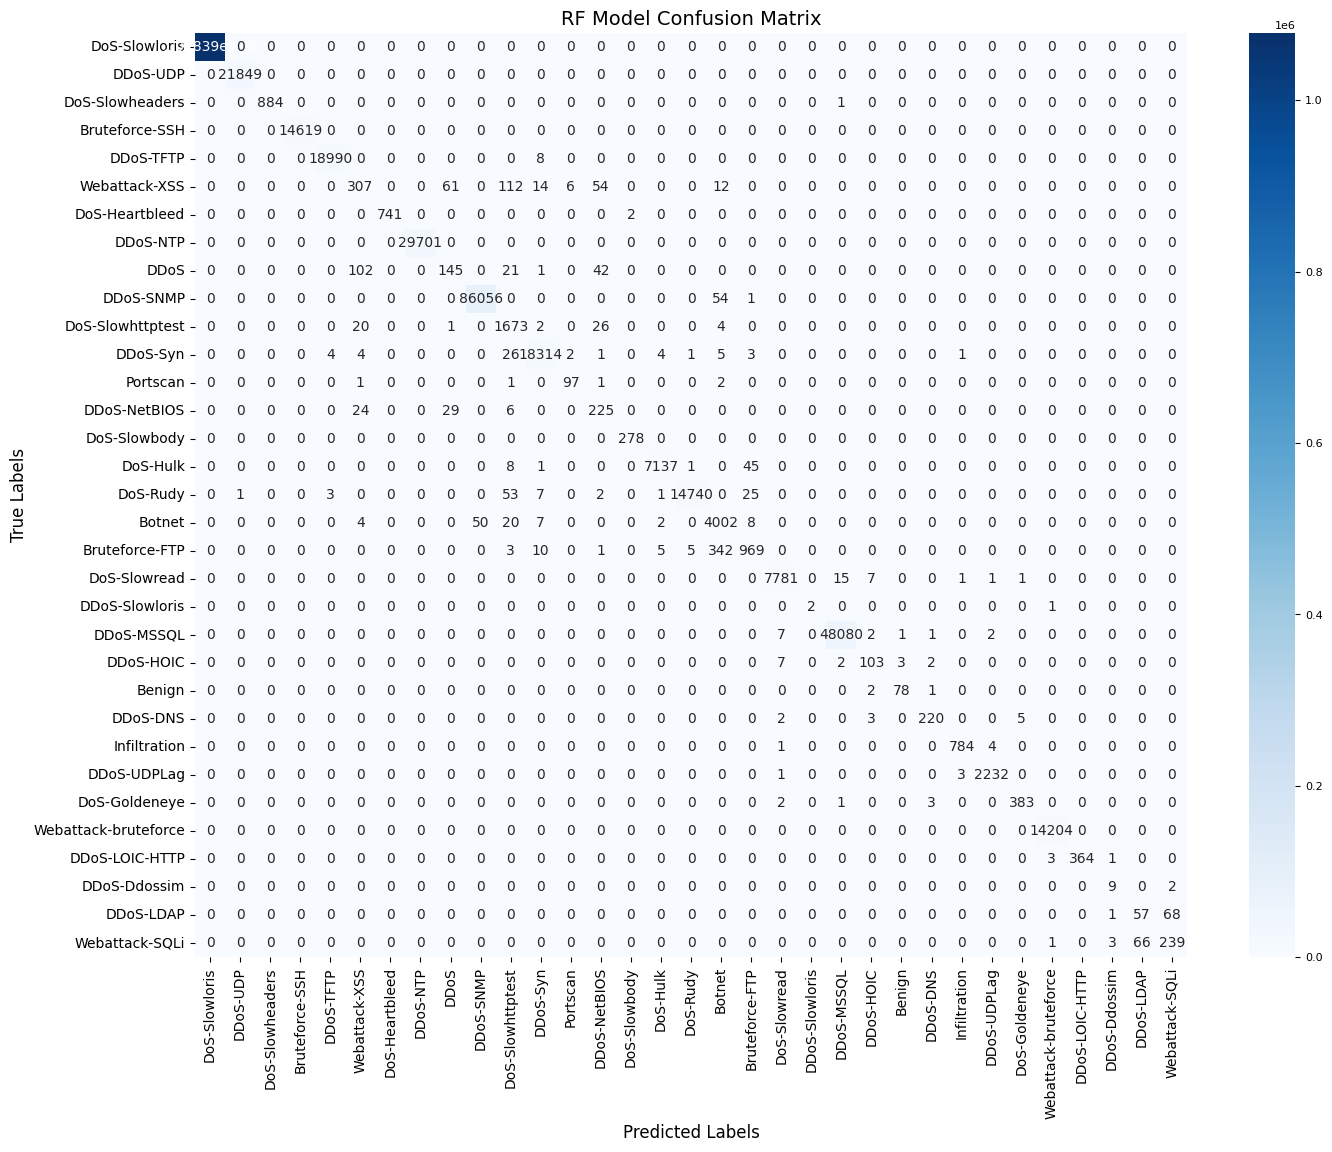

RF Model Classification Report:
                      precision    recall  f1-score   support

       DoS-Slowloris       1.00      1.00      1.00   1078386
            DDoS-UDP       1.00      1.00      1.00     21849
     DoS-Slowheaders       1.00      1.00      1.00       885
      Bruteforce-SSH       1.00      1.00      1.00     14619
           DDoS-TFTP       1.00      1.00      1.00     18998
       Webattack-XSS       0.66      0.54      0.60       566
      DoS-Heartbleed       1.00      1.00      1.00       743
            DDoS-NTP       1.00      1.00      1.00     29701
                DDoS       0.61      0.47      0.53       311
           DDoS-SNMP       1.00      1.00      1.00     86111
    DoS-Slowhttptest       0.87      0.97      0.92      1726
            DDoS-Syn       1.00      1.00      1.00     18365
            Portscan       0.92      0.95      0.94       102
        DDoS-NetBIOS       0.64      0.79      0.71       284
        DoS-Slowbody       0.99      

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

def train_random_forest(X_train, y_train, X_val, y_val, X_test, y_test):
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)
    
    # Predict on validation and test sets
    val_predictions = rf_model.predict(X_val)
    test_predictions = rf_model.predict(X_test)
    
    # Calculate and print accuracy
    val_accuracy = accuracy_score(y_val, val_predictions)
    test_accuracy = accuracy_score(y_test, test_predictions)
    print(f"Validation Accuracy: {val_accuracy:.6f}")
    print(f"Test Accuracy: {test_accuracy:.6f}")
    
    return test_accuracy, y_test, test_predictions

# Train the model and get predictions
meta_accuracy, y_meta_test, meta_predictions = train_random_forest(X_train, y_train, X_val, y_val, X_test, y_test)

# Print test accuracy
print(f"RF_accuracy: {meta_accuracy:.6f}")

# Confusion matrix
cm_meta = confusion_matrix(y_meta_test, meta_predictions)
plt.figure(figsize=(16, 12))
sns.heatmap(cm_meta, annot=True, fmt='g', cmap='Blues', xticklabels=labels, yticklabels=labels, annot_kws={"size": 10})
plt.title("RF Model Confusion Matrix", fontsize=14)
plt.xlabel('Predicted Labels', fontsize=12)
plt.ylabel('True Labels', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)  
plt.show()

# Classification report
print("RF Model Classification Report:")
print(classification_report(y_meta_test, meta_predictions, target_names=labels))


Validation Accuracy: 0.996565
Test Accuracy: 0.996506
MLP_accuracy: 0.996506


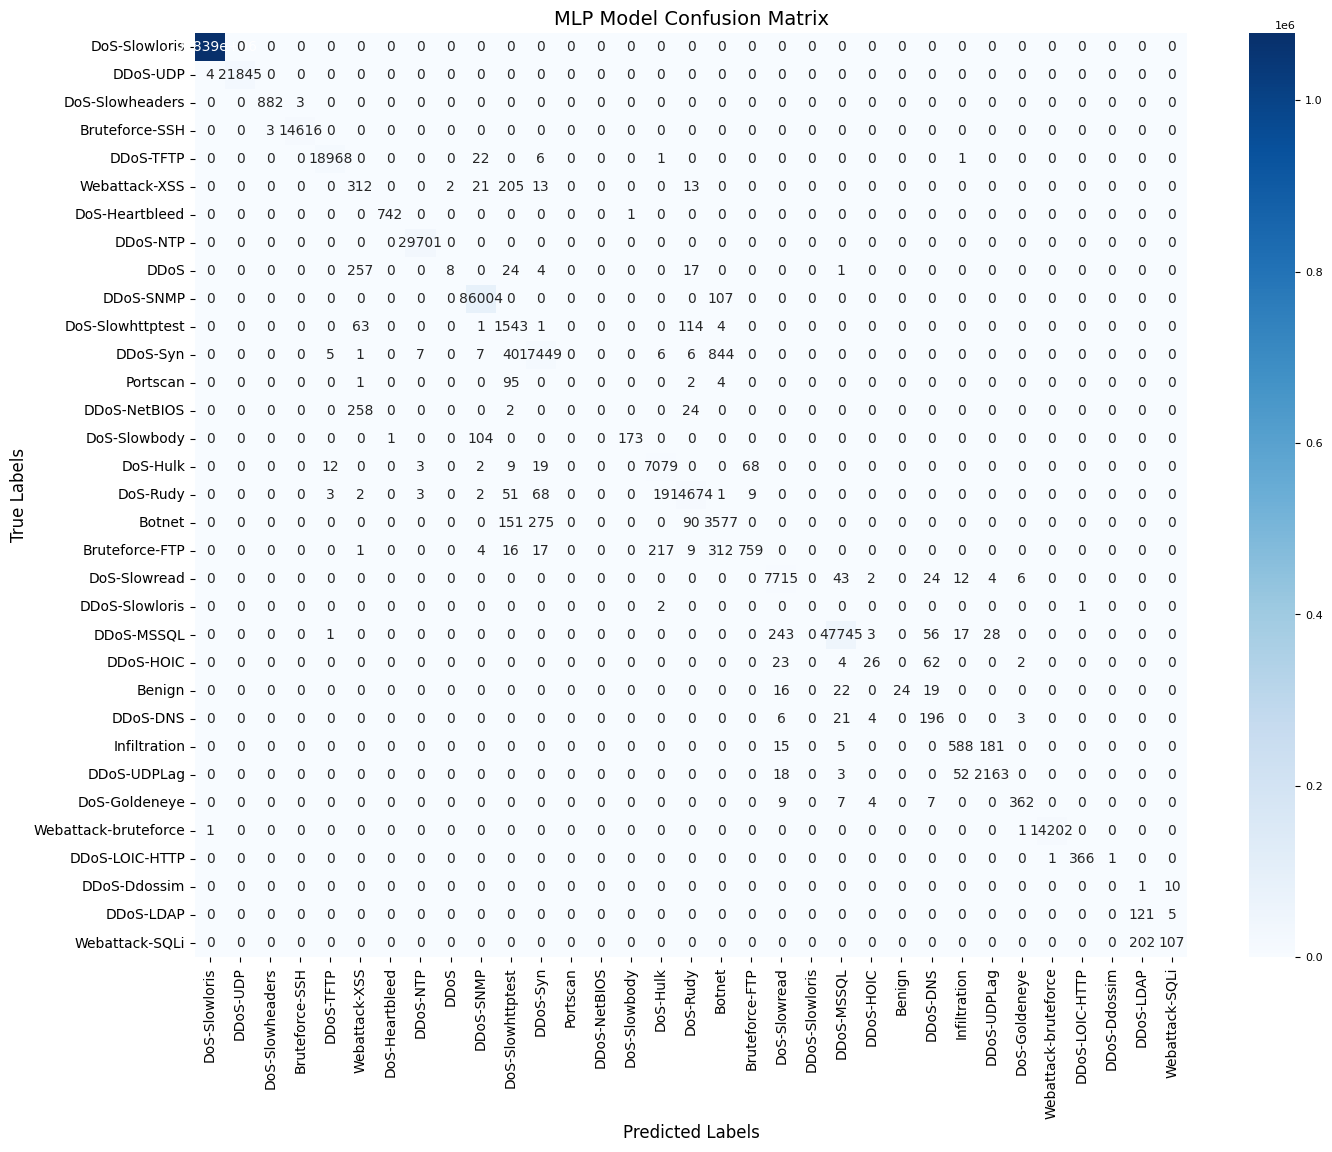

MLP Model Classification Report:


/home/work/soyeong/alvy/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/work/soyeong/alvy/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                      precision    recall  f1-score   support

       DoS-Slowloris       1.00      1.00      1.00   1078386
            DDoS-UDP       1.00      1.00      1.00     21849
     DoS-Slowheaders       1.00      1.00      1.00       885
      Bruteforce-SSH       1.00      1.00      1.00     14619
           DDoS-TFTP       1.00      1.00      1.00     18998
       Webattack-XSS       0.35      0.55      0.43       566
      DoS-Heartbleed       1.00      1.00      1.00       743
            DDoS-NTP       1.00      1.00      1.00     29701
                DDoS       0.80      0.03      0.05       311
           DDoS-SNMP       1.00      1.00      1.00     86111
    DoS-Slowhttptest       0.72      0.89      0.80      1726
            DDoS-Syn       0.98      0.95      0.96     18365
            Portscan       0.00      0.00      0.00       102
        DDoS-NetBIOS       0.00      0.00      0.00       284
        DoS-Slowbody       0.99      0.62      0.77       278
       

/home/work/soyeong/alvy/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

def train_mlp(X_train, y_train, X_val, y_val, X_test, y_test):
    # Initialize MLP model with one hidden layer of 100 units and a fixed random state
    mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
    mlp_model.fit(X_train, y_train)
    
    # Predict on validation and test sets
    val_predictions = mlp_model.predict(X_val)
    test_predictions = mlp_model.predict(X_test)
    
    # Calculate and print accuracy
    val_accuracy = accuracy_score(y_val, val_predictions)
    test_accuracy = accuracy_score(y_test, test_predictions)
    print(f"Validation Accuracy: {val_accuracy:.6f}")
    print(f"Test Accuracy: {test_accuracy:.6f}")
    
    return test_accuracy, y_test, test_predictions

# Train the model and get predictions
meta_accuracy, y_meta_test, meta_predictions = train_mlp(X_train, y_train, X_val, y_val, X_test, y_test)

# Print test accuracy
print(f"MLP_accuracy: {meta_accuracy:.6f}")

# Confusion matrix
cm_meta = confusion_matrix(y_meta_test, meta_predictions)
plt.figure(figsize=(16, 12))
sns.heatmap(cm_meta, annot=True, fmt='g', cmap='Blues', xticklabels=labels, yticklabels=labels, annot_kws={"size": 10})
plt.title("MLP Model Confusion Matrix", fontsize=14)
plt.xlabel('Predicted Labels', fontsize=12)
plt.ylabel('True Labels', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)  
plt.show()

# Classification report
print("MLP Model Classification Report:")
print(classification_report(y_meta_test, meta_predictions, target_names=labels))


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

def train_svm(X_train, y_train, X_val, y_val, X_test, y_test):
    # Initialize SVM model with a radial basis function kernel (RBF)
    svm_model = SVC(kernel='rbf', random_state=42)
    svm_model.fit(X_train, y_train)
    
    # Predict on validation and test sets
    val_predictions = svm_model.predict(X_val)
    test_predictions = svm_model.predict(X_test)
    
    # Calculate and print accuracy
    val_accuracy = accuracy_score(y_val, val_predictions)
    test_accuracy = accuracy_score(y_test, test_predictions)
    print(f"Validation Accuracy: {val_accuracy:.6f}")
    print(f"Test Accuracy: {test_accuracy:.6f}")
    
    return test_accuracy, y_test, test_predictions

# Train the model and get predictions
meta_accuracy, y_meta_test, meta_predictions = train_svm(X_train, y_train, X_val, y_val, X_test, y_test)

# Print test accuracy
print(f"SVM_accuracy: {meta_accuracy:.6f}")

# Confusion matrix
cm_meta = confusion_matrix(y_meta_test, meta_predictions)
plt.figure(figsize=(16, 12))
sns.heatmap(cm_meta, annot=True, fmt='g', cmap='Blues', xticklabels=labels, yticklabels=labels, annot_kws={"size": 10})
plt.title("SVM Model Confusion Matrix", fontsize=14)
plt.xlabel('Predicted Labels', fontsize=12)
plt.ylabel('True Labels', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)  
plt.show()

# Classification report
print("SVM Model Classification Report:")
print(classification_report(y_meta_test, meta_predictions, target_names=labels))


Validation Accuracy: 0.980523
Test Accuracy: 0.982273
Bagging_accuracy: 0.982273


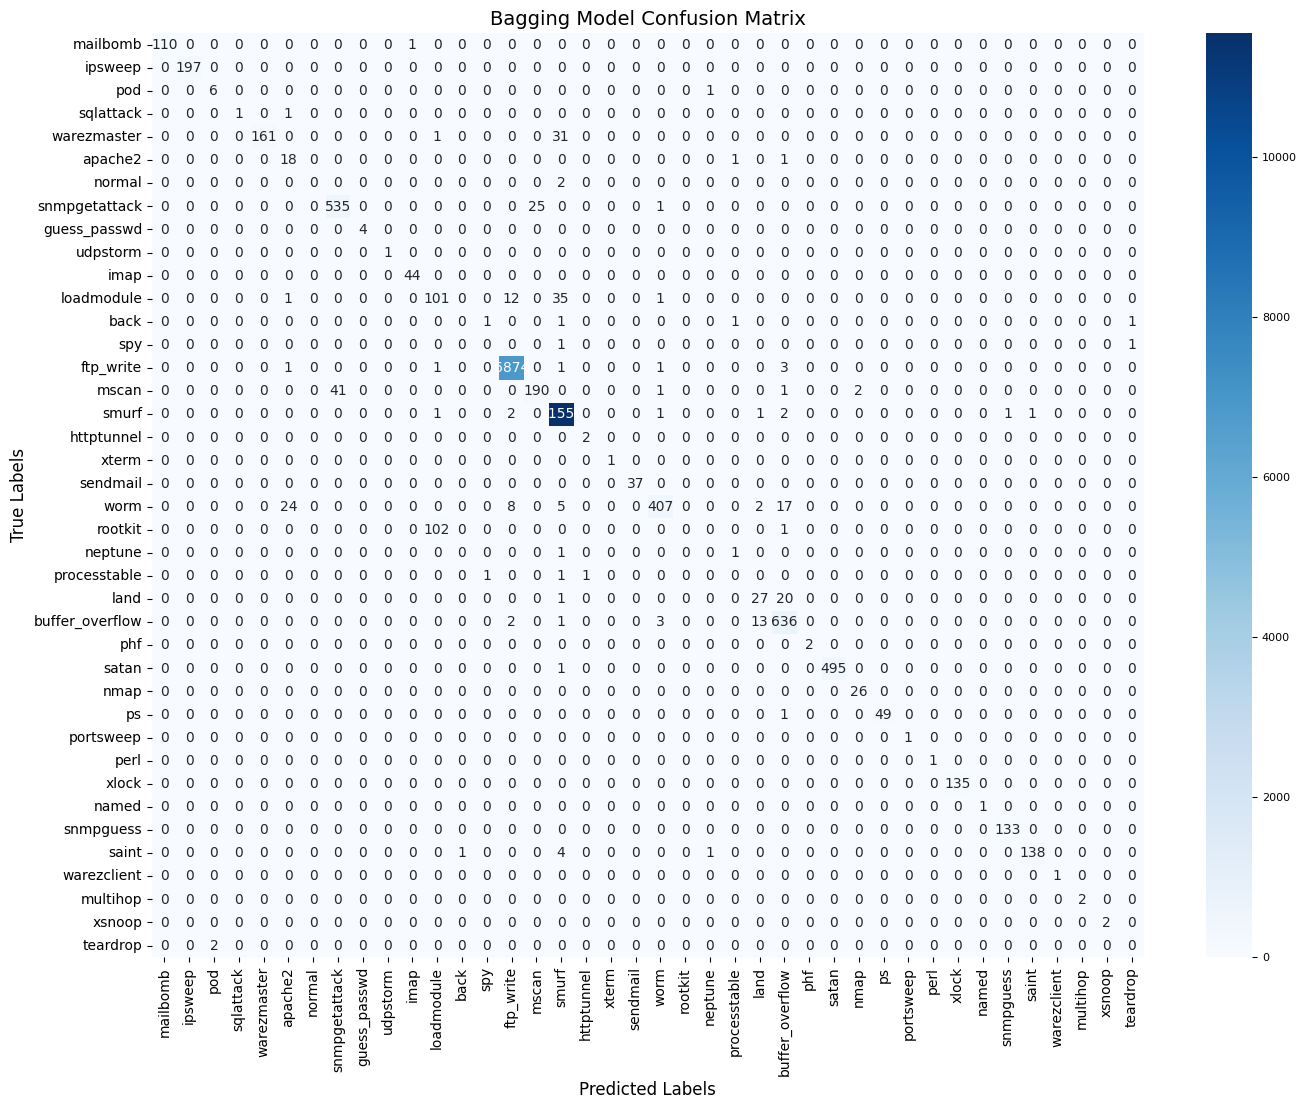

Bagging Model Classification Report:
                 precision    recall  f1-score   support

       mailbomb       1.00      0.99      1.00       111
        ipsweep       1.00      1.00      1.00       197
            pod       0.75      0.86      0.80         7
      sqlattack       1.00      0.50      0.67         2
    warezmaster       1.00      0.83      0.91       193
        apache2       0.40      0.90      0.55        20
         normal       0.00      0.00      0.00         2
  snmpgetattack       0.93      0.95      0.94       561
   guess_passwd       1.00      1.00      1.00         4
       udpstorm       1.00      1.00      1.00         1
           imap       0.98      1.00      0.99        44
     loadmodule       0.49      0.67      0.57       150
           back       0.00      0.00      0.00         4
            spy       0.00      0.00      0.00         2
      ftp_write       1.00      1.00      1.00      6881
          mscan       0.88      0.81      0.84    

/home/work/soyeong/alvy/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/work/soyeong/alvy/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/work/soyeong/alvy/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier

def train_bagging(X_train, y_train, X_val, y_val, X_test, y_test):
    # Initialize BaggingClassifier with a DecisionTree as base estimator
    bagging_model = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)
    bagging_model.fit(X_train, y_train)
    
    # Predict on validation and test sets
    val_predictions = bagging_model.predict(X_val)
    test_predictions = bagging_model.predict(X_test)
    
    # Calculate and print accuracy
    val_accuracy = accuracy_score(y_val, val_predictions)
    test_accuracy = accuracy_score(y_test, test_predictions)
    print(f"Validation Accuracy: {val_accuracy:.6f}")
    print(f"Test Accuracy: {test_accuracy:.6f}")
    
    return test_accuracy, y_test, test_predictions

# Train the model and get predictions
meta_accuracy, y_meta_test, meta_predictions = train_bagging(X_train, y_train, X_val, y_val, X_test, y_test)

# Print test accuracy
print(f"Bagging_accuracy: {meta_accuracy:.6f}")

# Confusion matrix
cm_meta = confusion_matrix(y_meta_test, meta_predictions)
plt.figure(figsize=(16, 12))
sns.heatmap(cm_meta, annot=True, fmt='g', cmap='Blues', xticklabels=labels, yticklabels=labels, annot_kws={"size": 10})
plt.title("Bagging Model Confusion Matrix", fontsize=14)
plt.xlabel('Predicted Labels', fontsize=12)
plt.ylabel('True Labels', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)  
plt.show()

# Classification report
print("Bagging Model Classification Report:")
print(classification_report(y_meta_test, meta_predictions, target_names=labels))


Validation Accuracy: 0.979087
Test Accuracy: 0.979267
KNN_accuracy: 0.979267


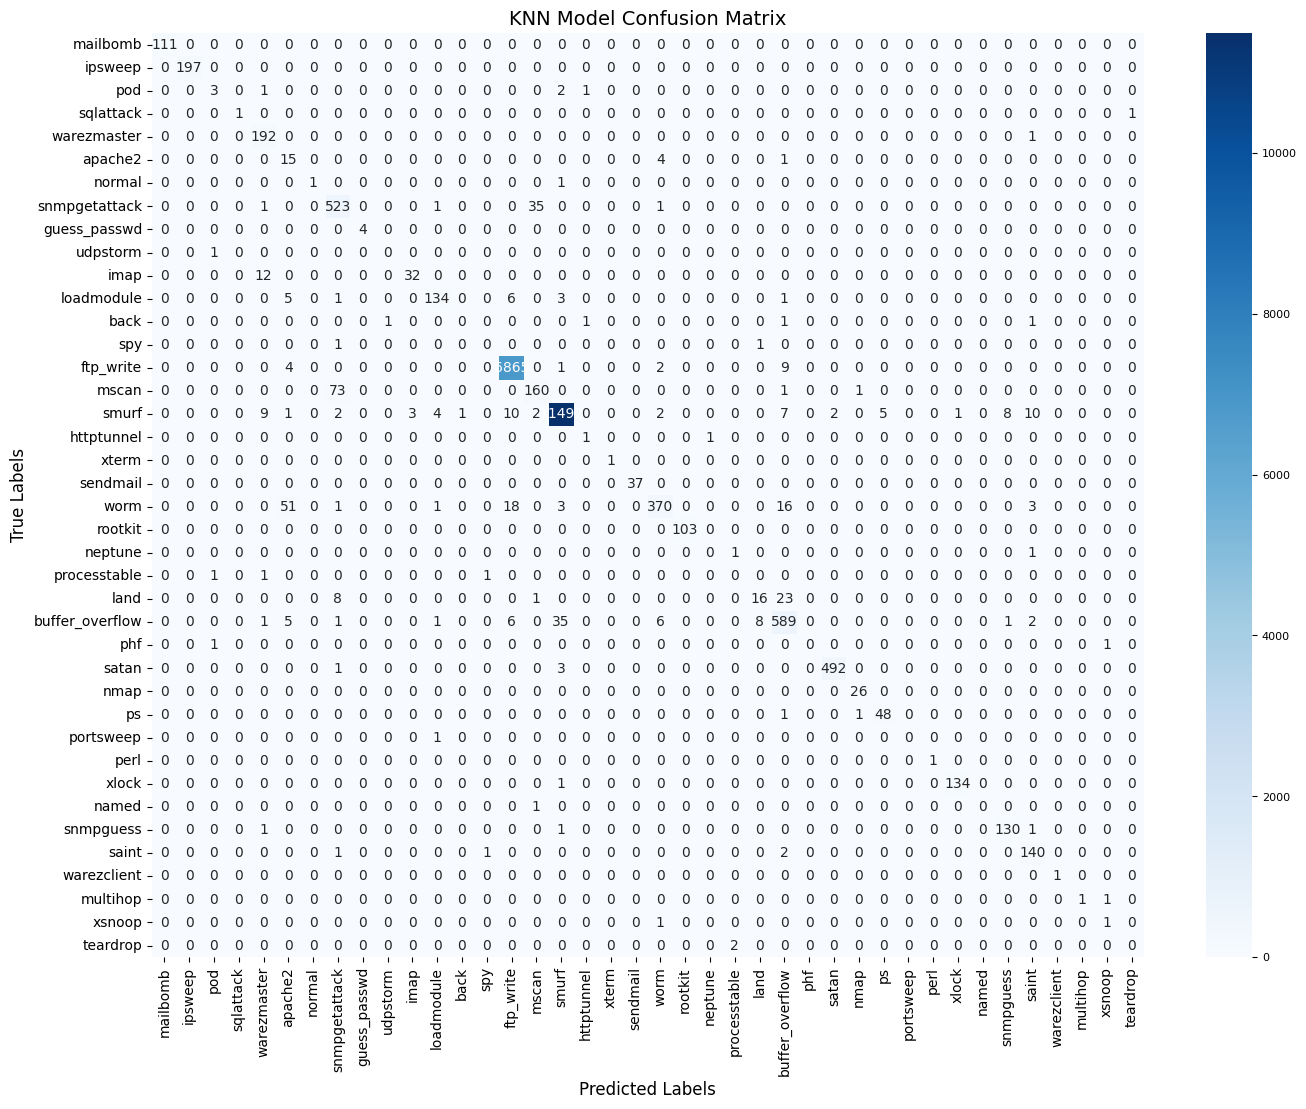

KNN Model Classification Report:
                 precision    recall  f1-score   support

       mailbomb       1.00      1.00      1.00       111
        ipsweep       1.00      1.00      1.00       197
            pod       0.50      0.43      0.46         7
      sqlattack       1.00      0.50      0.67         2
    warezmaster       0.88      0.99      0.93       193
        apache2       0.19      0.75      0.30        20
         normal       1.00      0.50      0.67         2
  snmpgetattack       0.85      0.93      0.89       561
   guess_passwd       1.00      1.00      1.00         4
       udpstorm       0.00      0.00      0.00         1
           imap       0.91      0.73      0.81        44
     loadmodule       0.94      0.89      0.92       150
           back       0.00      0.00      0.00         4
            spy       0.00      0.00      0.00         2
      ftp_write       0.99      1.00      1.00      6881
          mscan       0.80      0.68      0.74       2

/home/work/soyeong/alvy/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/work/soyeong/alvy/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/work/soyeong/alvy/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

def train_knn(X_train, y_train, X_val, y_val, X_test, y_test):
    # Initialize KNN classifier with 5 neighbors
    knn_model = KNeighborsClassifier(n_neighbors=5)
    knn_model.fit(X_train, y_train)
    
    # Predict on validation and test sets
    val_predictions = knn_model.predict(X_val)
    test_predictions = knn_model.predict(X_test)
    
    # Calculate and print accuracy
    val_accuracy = accuracy_score(y_val, val_predictions)
    test_accuracy = accuracy_score(y_test, test_predictions)
    print(f"Validation Accuracy: {val_accuracy:.6f}")
    print(f"Test Accuracy: {test_accuracy:.6f}")
    
    return test_accuracy, y_test, test_predictions

# Train the model and get predictions
meta_accuracy, y_meta_test, meta_predictions = train_knn(X_train, y_train, X_val, y_val, X_test, y_test)

# Print test accuracy
print(f"KNN_accuracy: {meta_accuracy:.6f}")

# Confusion matrix
cm_meta = confusion_matrix(y_meta_test, meta_predictions)
plt.figure(figsize=(16, 12))
sns.heatmap(cm_meta, annot=True, fmt='g', cmap='Blues', xticklabels=labels, yticklabels=labels, annot_kws={"size": 10})
plt.title("KNN Model Confusion Matrix", fontsize=14)
plt.xlabel('Predicted Labels', fontsize=12)
plt.ylabel('True Labels', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)  
plt.show()

# Classification report
print("KNN Model Classification Report:")
print(classification_report(y_meta_test, meta_predictions, target_names=labels))


/home/work/soyeong/alvy/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Validation Accuracy: 0.806130
Test Accuracy: 0.805861
AdaBoost_accuracy: 0.805861


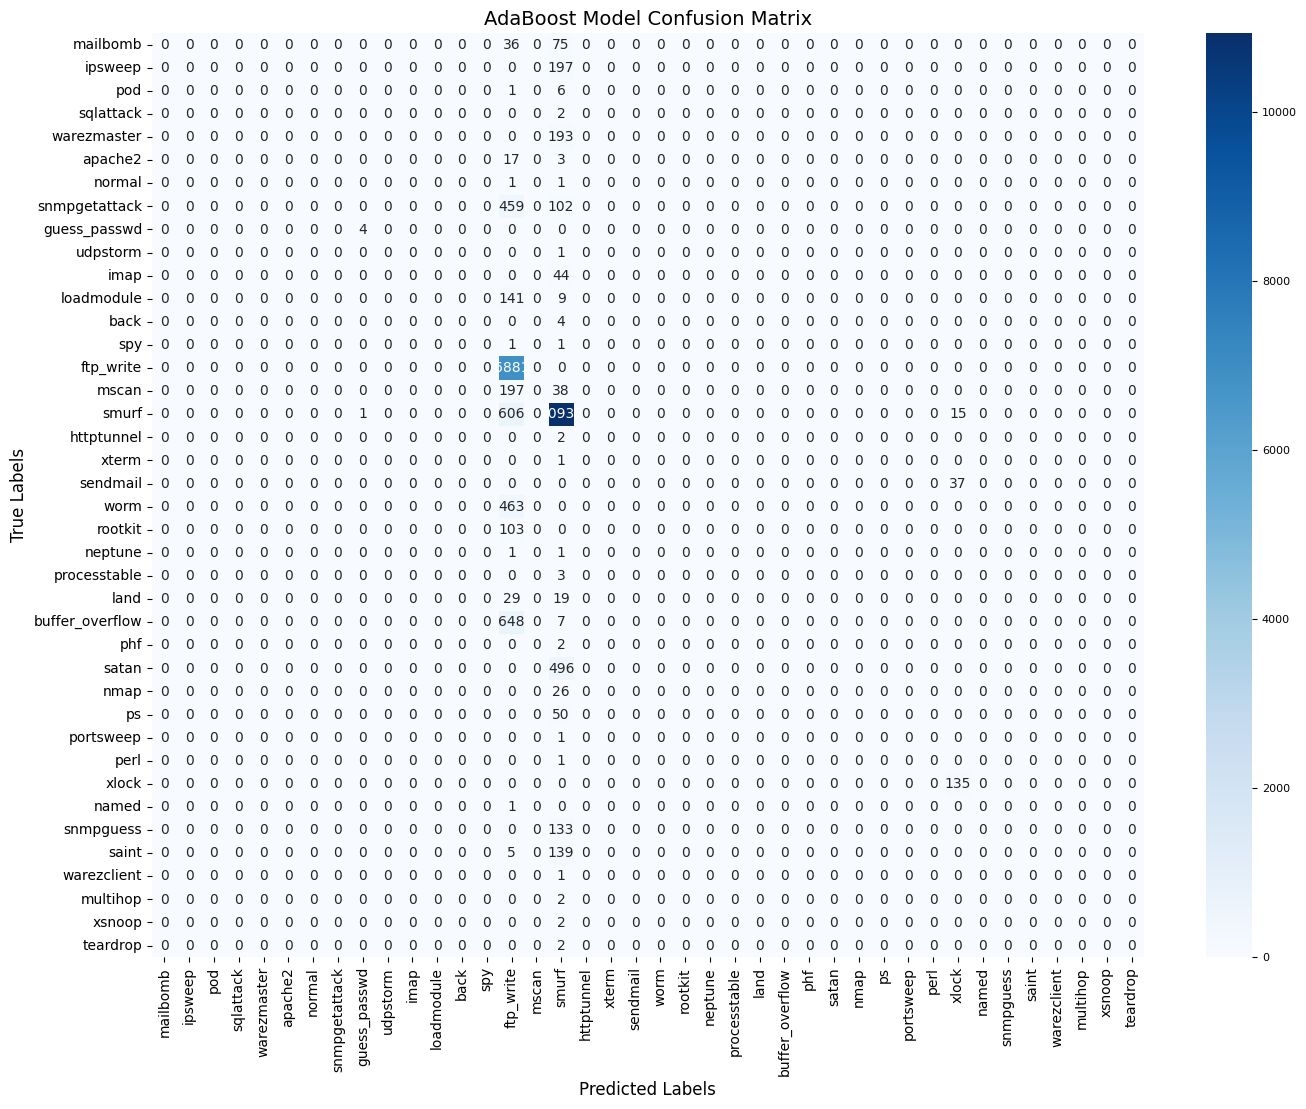

AdaBoost Model Classification Report:
                 precision    recall  f1-score   support

       mailbomb       0.00      0.00      0.00       111
        ipsweep       0.00      0.00      0.00       197
            pod       0.00      0.00      0.00         7
      sqlattack       0.00      0.00      0.00         2
    warezmaster       0.00      0.00      0.00       193
        apache2       0.00      0.00      0.00        20
         normal       0.00      0.00      0.00         2
  snmpgetattack       0.00      0.00      0.00       561
   guess_passwd       0.80      1.00      0.89         4
       udpstorm       0.00      0.00      0.00         1
           imap       0.00      0.00      0.00        44
     loadmodule       0.00      0.00      0.00       150
           back       0.00      0.00      0.00         4
            spy       0.00      0.00      0.00         2
      ftp_write       0.72      1.00      0.84      6881
          mscan       0.00      0.00      0.00   

/home/work/soyeong/alvy/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/work/soyeong/alvy/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/work/soyeong/alvy/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

def train_adaboost(X_train, y_train, X_val, y_val, X_test, y_test):
    # Initialize AdaBoostClassifier without explicitly defining base_estimator (default is DecisionTree)
    adaboost_model = AdaBoostClassifier(n_estimators=100, random_state=42)
    adaboost_model.fit(X_train, y_train)
    
    # Predict on validation and test sets
    val_predictions = adaboost_model.predict(X_val)
    test_predictions = adaboost_model.predict(X_test)
    
    # Calculate and print accuracy
    val_accuracy = accuracy_score(y_val, val_predictions)
    test_accuracy = accuracy_score(y_test, test_predictions)
    print(f"Validation Accuracy: {val_accuracy:.6f}")
    print(f"Test Accuracy: {test_accuracy:.6f}")
    
    return test_accuracy, y_test, test_predictions

# Train the model and get predictions
meta_accuracy, y_meta_test, meta_predictions = train_adaboost(X_train, y_train, X_val, y_val, X_test, y_test)

# Print test accuracy
print(f"AdaBoost_accuracy: {meta_accuracy:.6f}")

# Confusion matrix
cm_meta = confusion_matrix(y_meta_test, meta_predictions)
plt.figure(figsize=(16, 12))
sns.heatmap(cm_meta, annot=True, fmt='g', cmap='Blues', xticklabels=labels, yticklabels=labels, annot_kws={"size": 10})
plt.title("AdaBoost Model Confusion Matrix", fontsize=14)
plt.xlabel('Predicted Labels', fontsize=12)
plt.ylabel('True Labels', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)  
plt.show()

# Classification report
print("AdaBoost Model Classification Report:")
print(classification_report(y_meta_test, meta_predictions, target_names=labels))


Validation Accuracy: 0.970157
Test Accuracy: 0.971727
DecisionTree_accuracy: 0.971727


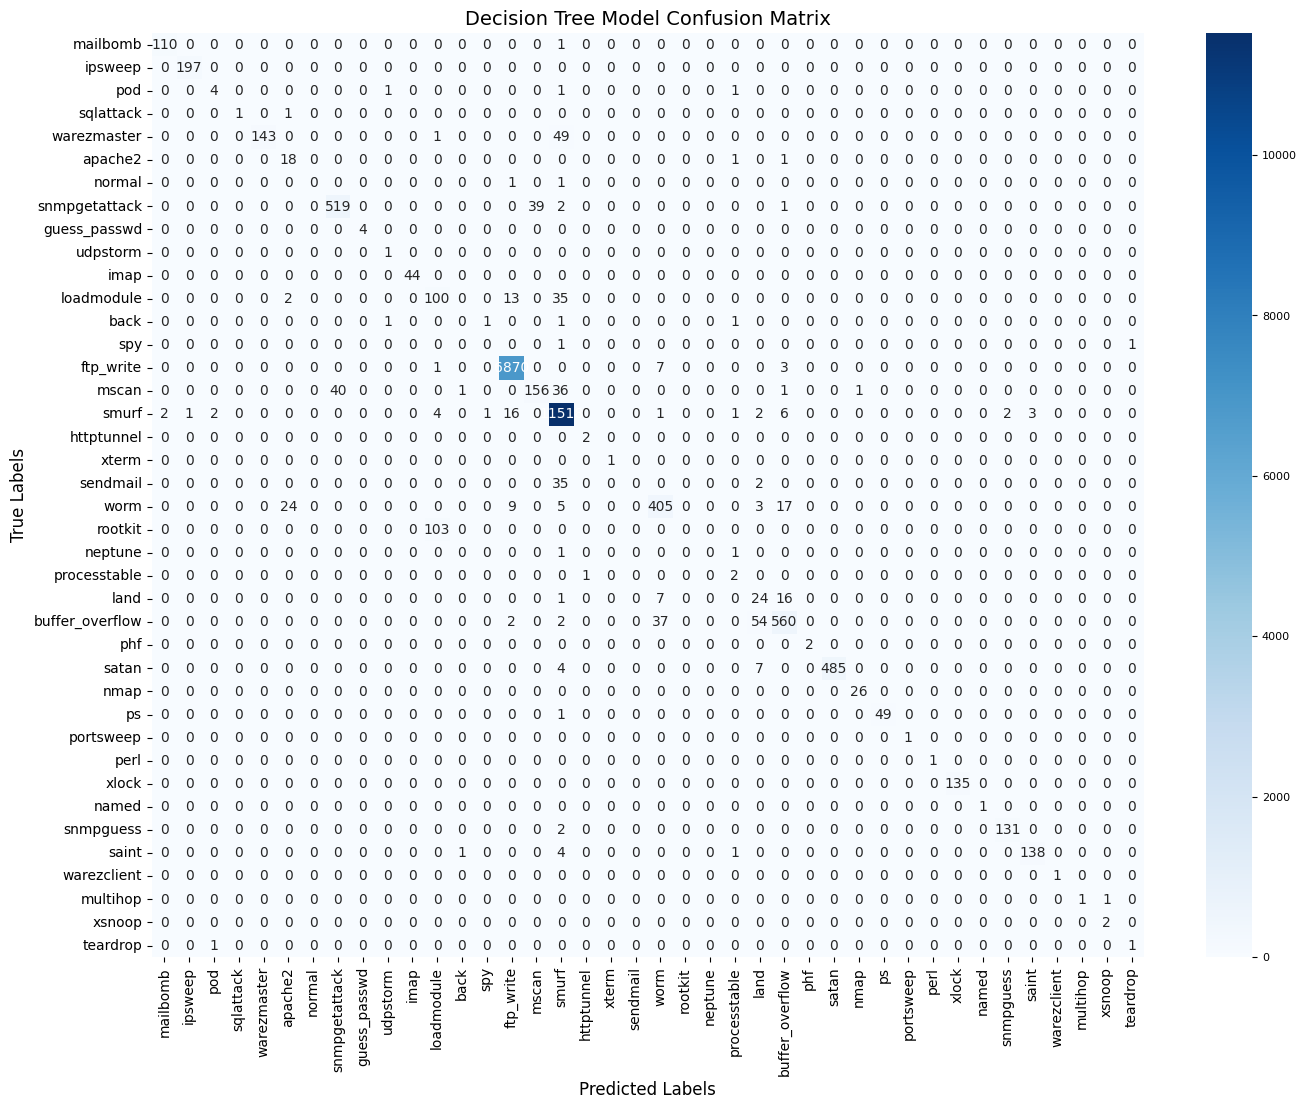

Decision Tree Model Classification Report:
                 precision    recall  f1-score   support

       mailbomb       0.98      0.99      0.99       111
        ipsweep       0.99      1.00      1.00       197
            pod       0.57      0.57      0.57         7
      sqlattack       1.00      0.50      0.67         2
    warezmaster       1.00      0.74      0.85       193
        apache2       0.40      0.90      0.55        20
         normal       0.00      0.00      0.00         2
  snmpgetattack       0.93      0.93      0.93       561
   guess_passwd       1.00      1.00      1.00         4
       udpstorm       0.33      1.00      0.50         1
           imap       1.00      1.00      1.00        44
     loadmodule       0.48      0.67      0.56       150
           back       0.00      0.00      0.00         4
            spy       0.00      0.00      0.00         2
      ftp_write       0.99      1.00      1.00      6881
          mscan       0.80      0.66      0.

/home/work/soyeong/alvy/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/work/soyeong/alvy/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/work/soyeong/alvy/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

def train_decision_tree(X_train, y_train, X_val, y_val, X_test, y_test):
    # Initialize DecisionTreeClassifier
    dt_model = DecisionTreeClassifier(random_state=42)
    dt_model.fit(X_train, y_train)
    
    # Predict on validation and test sets
    val_predictions = dt_model.predict(X_val)
    test_predictions = dt_model.predict(X_test)
    
    # Calculate and print accuracy
    val_accuracy = accuracy_score(y_val, val_predictions)
    test_accuracy = accuracy_score(y_test, test_predictions)
    print(f"Validation Accuracy: {val_accuracy:.6f}")
    print(f"Test Accuracy: {test_accuracy:.6f}")
    
    return test_accuracy, y_test, test_predictions

# Train the model and get predictions
meta_accuracy, y_meta_test, meta_predictions = train_decision_tree(X_train, y_train, X_val, y_val, X_test, y_test)

# Print test accuracy
print(f"DecisionTree_accuracy: {meta_accuracy:.6f}")

# Confusion matrix
cm_meta = confusion_matrix(y_meta_test, meta_predictions)
plt.figure(figsize=(16, 12))
sns.heatmap(cm_meta, annot=True, fmt='g', cmap='Blues', xticklabels=labels, yticklabels=labels, annot_kws={"size": 10})
plt.title("Decision Tree Model Confusion Matrix", fontsize=14)
plt.xlabel('Predicted Labels', fontsize=12)
plt.ylabel('True Labels', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)  
plt.show()

# Classification report
print("Decision Tree Model Classification Report:")
print(classification_report(y_meta_test, meta_predictions, target_names=labels))


/home/work/soyeong/alvy/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [14:49:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Validation Accuracy: 0.985280
Test Accuracy: 0.986986
XGBoost_accuracy: 0.986986


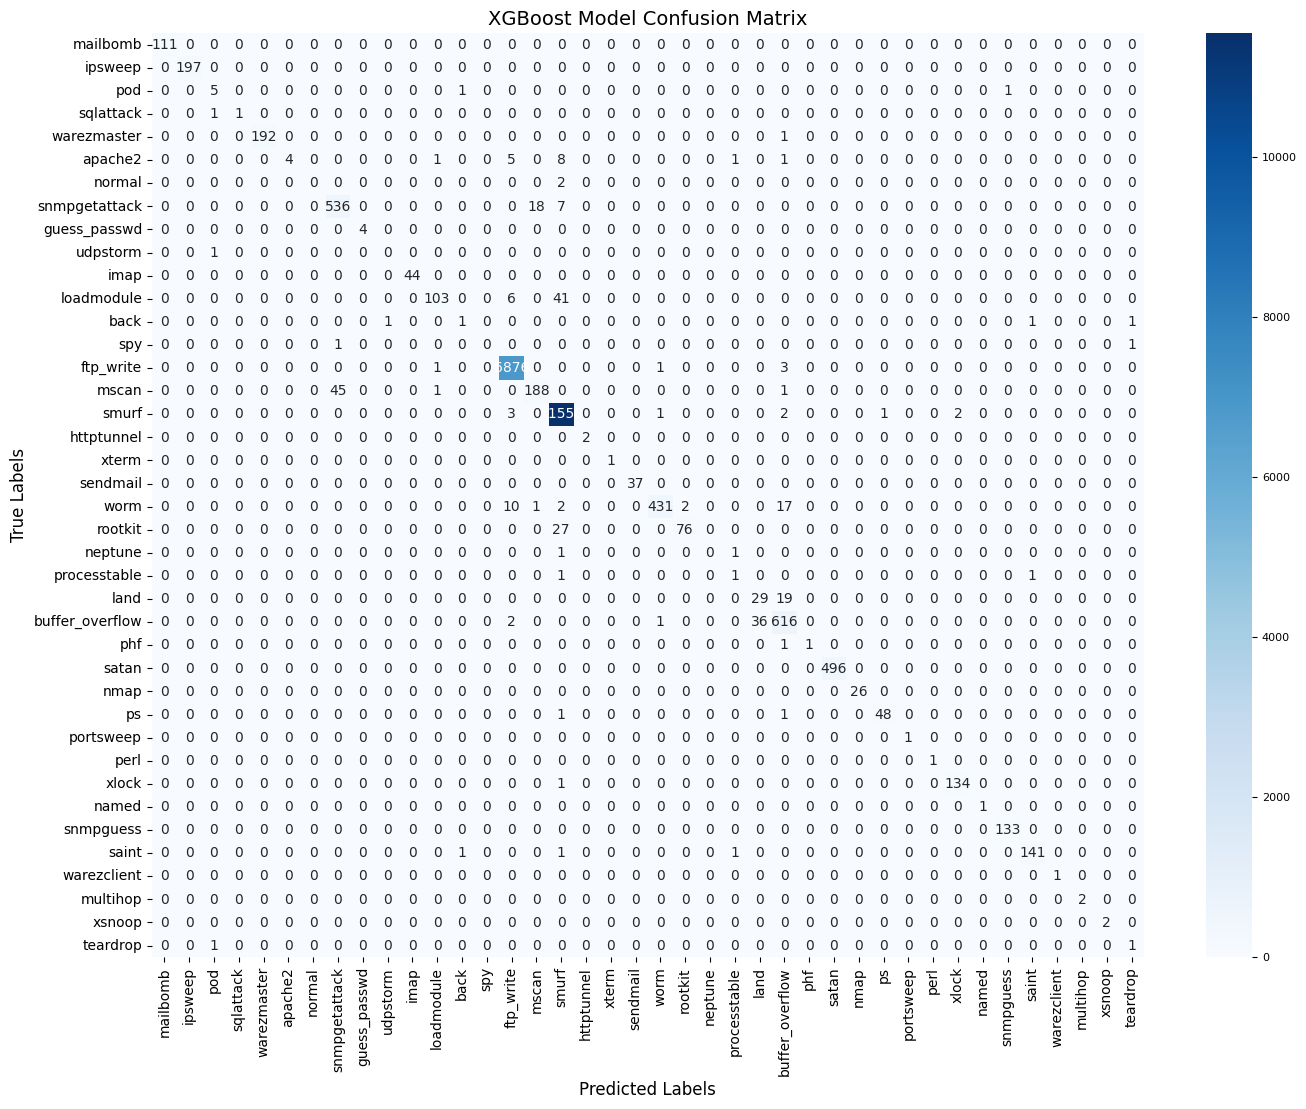

XGBoost Model Classification Report:
                 precision    recall  f1-score   support

       mailbomb       1.00      1.00      1.00       111
        ipsweep       1.00      1.00      1.00       197
            pod       0.62      0.71      0.67         7
      sqlattack       1.00      0.50      0.67         2
    warezmaster       1.00      0.99      1.00       193
        apache2       1.00      0.20      0.33        20
         normal       0.00      0.00      0.00         2
  snmpgetattack       0.92      0.96      0.94       561
   guess_passwd       1.00      1.00      1.00         4
       udpstorm       0.00      0.00      0.00         1
           imap       1.00      1.00      1.00        44
     loadmodule       0.97      0.69      0.80       150
           back       0.33      0.25      0.29         4
            spy       0.00      0.00      0.00         2
      ftp_write       1.00      1.00      1.00      6881
          mscan       0.91      0.80      0.85    

/home/work/soyeong/alvy/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/work/soyeong/alvy/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/work/soyeong/alvy/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

def train_xgboost(X_train, y_train, X_val, y_val, X_test, y_test):
    # Initialize XGBClassifier
    xgboost_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')
    xgboost_model.fit(X_train, y_train)
    
    # Predict on validation and test sets
    val_predictions = xgboost_model.predict(X_val)
    test_predictions = xgboost_model.predict(X_test)
    
    # Calculate and print accuracy
    val_accuracy = accuracy_score(y_val, val_predictions)
    test_accuracy = accuracy_score(y_test, test_predictions)
    print(f"Validation Accuracy: {val_accuracy:.6f}")
    print(f"Test Accuracy: {test_accuracy:.6f}")
    
    return test_accuracy, y_test, test_predictions

# Train the model and get predictions
meta_accuracy, y_meta_test, meta_predictions = train_xgboost(X_train, y_train, X_val, y_val, X_test, y_test)

# Print test accuracy
print(f"XGBoost_accuracy: {meta_accuracy:.6f}")

# Confusion matrix
cm_meta = confusion_matrix(y_meta_test, meta_predictions)
plt.figure(figsize=(16, 12))
sns.heatmap(cm_meta, annot=True, fmt='g', cmap='Blues', xticklabels=labels, yticklabels=labels, annot_kws={"size": 10})
plt.title("XGBoost Model Confusion Matrix", fontsize=14)
plt.xlabel('Predicted Labels', fontsize=12)
plt.ylabel('True Labels', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)  
plt.show()

# Classification report
print("XGBoost Model Classification Report:")
print(classification_report(y_meta_test, meta_predictions, target_names=labels))


0:	learn: 1.0223685	total: 543ms	remaining: 9m 2s
100:	learn: 0.0528572	total: 31.4s	remaining: 4m 39s
200:	learn: 0.0363245	total: 1m 1s	remaining: 4m 2s
300:	learn: 0.0297269	total: 1m 32s	remaining: 3m 35s
400:	learn: 0.0260450	total: 2m 3s	remaining: 3m 4s
500:	learn: 0.0233359	total: 2m 35s	remaining: 2m 34s
600:	learn: 0.0213141	total: 3m 4s	remaining: 2m 2s
700:	learn: 0.0197404	total: 3m 34s	remaining: 1m 31s
800:	learn: 0.0185807	total: 4m 1s	remaining: 1m
900:	learn: 0.0177939	total: 4m 29s	remaining: 29.6s
999:	learn: 0.0171000	total: 4m 59s	remaining: 0us
Validation Accuracy: 0.989633
Test Accuracy: 0.991563
CatBoost_accuracy: 0.991563


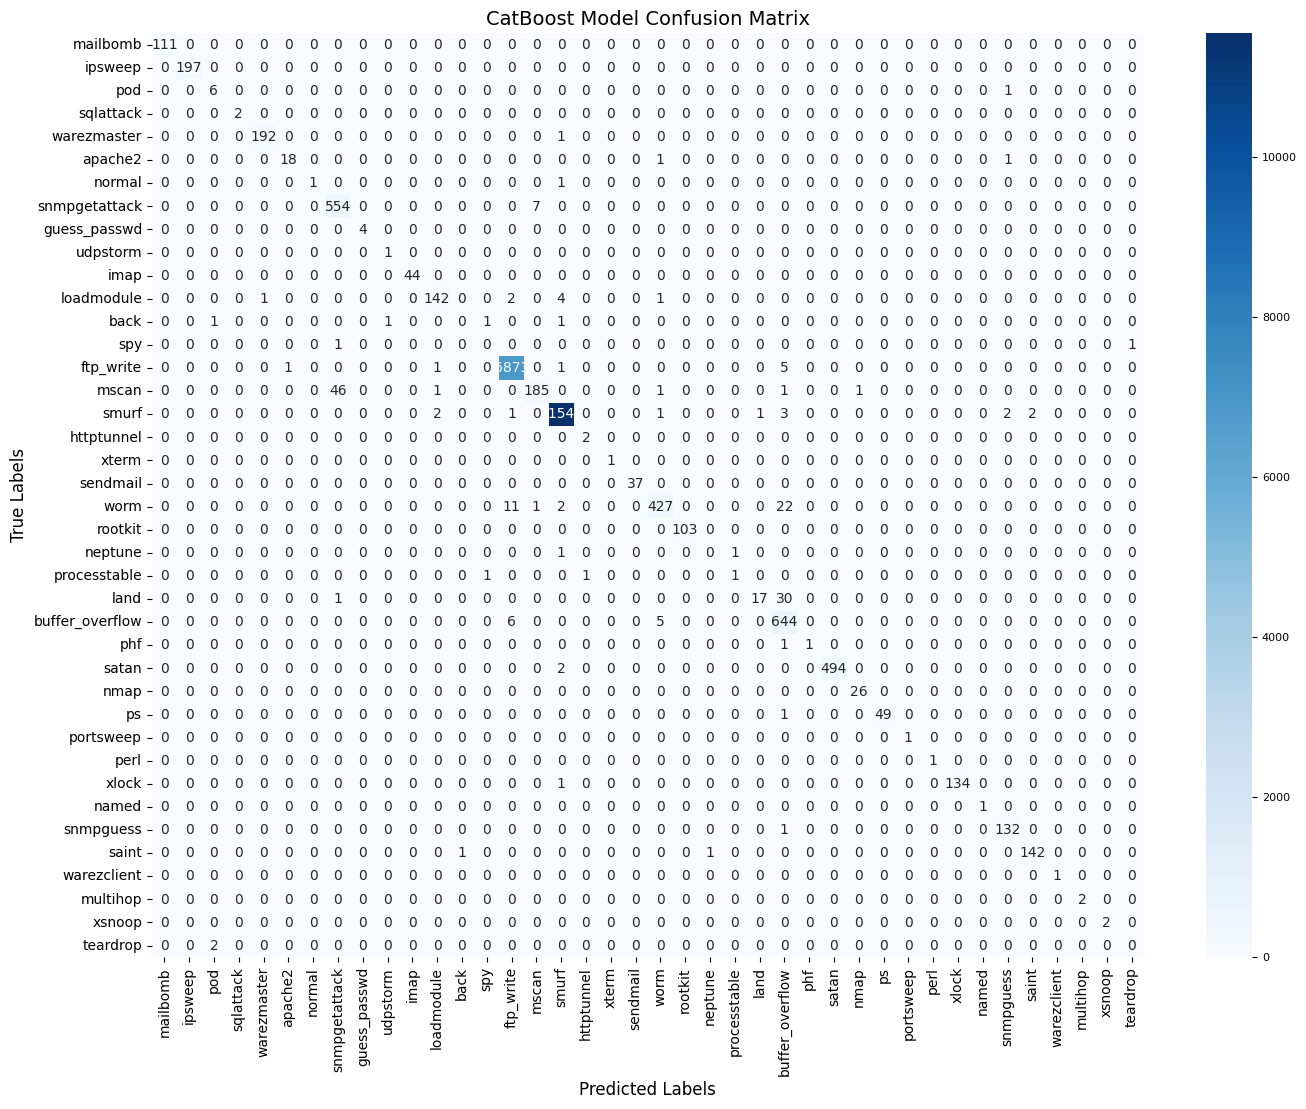

CatBoost Model Classification Report:
                 precision    recall  f1-score   support

       mailbomb       1.00      1.00      1.00       111
        ipsweep       1.00      1.00      1.00       197
            pod       0.67      0.86      0.75         7
      sqlattack       1.00      1.00      1.00         2
    warezmaster       0.99      0.99      0.99       193
        apache2       0.95      0.90      0.92        20
         normal       1.00      0.50      0.67         2
  snmpgetattack       0.92      0.99      0.95       561
   guess_passwd       1.00      1.00      1.00         4
       udpstorm       0.50      1.00      0.67         1
           imap       1.00      1.00      1.00        44
     loadmodule       0.97      0.95      0.96       150
           back       0.00      0.00      0.00         4
            spy       0.00      0.00      0.00         2
      ftp_write       1.00      1.00      1.00      6881
          mscan       0.96      0.79      0.86   

In [ ]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

def train_catboost(X_train, y_train, X_val, y_val, X_test, y_test):
    # Initialize CatBoostClassifier
    catboost_model = CatBoostClassifier(random_state=42, iterations=1000, learning_rate=0.1, depth=6, cat_features=[])
    catboost_model.fit(X_train, y_train, cat_features=[], verbose=100)  # verbose=100 for progress info
    
    # Predict on validation and test sets
    val_predictions = catboost_model.predict(X_val)
    test_predictions = catboost_model.predict(X_test)
    
    # Calculate and print accuracy
    val_accuracy = accuracy_score(y_val, val_predictions)
    test_accuracy = accuracy_score(y_test, test_predictions)
    print(f"Validation Accuracy: {val_accuracy:.6f}")
    print(f"Test Accuracy: {test_accuracy:.6f}")
    
    return test_accuracy, y_test, test_predictions

# Train the model and get predictions
meta_accuracy, y_meta_test, meta_predictions = train_catboost(X_train, y_train, X_val, y_val, X_test, y_test)

# Print test accuracy
print(f"CatBoost_accuracy: {meta_accuracy:.6f}")

# Confusion matrix
cm_meta = confusion_matrix(y_meta_test, meta_predictions)
plt.figure(figsize=(16, 12))
sns.heatmap(cm_meta, annot=True, fmt='g', cmap='Blues', xticklabels=labels, yticklabels=labels, annot_kws={"size": 10})
plt.title("CatBoost Model Confusion Matrix", fontsize=14)
plt.xlabel('Predicted Labels', fontsize=12)
plt.ylabel('True Labels', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)  
plt.show()

# Classification report
print("CatBoost Model Classification Report:")
print(classification_report(y_meta_test, meta_predictions, target_names=labels))


Validation Accuracy: 0.414127
Test Accuracy: 0.410582
GNB_accuracy: 0.410582


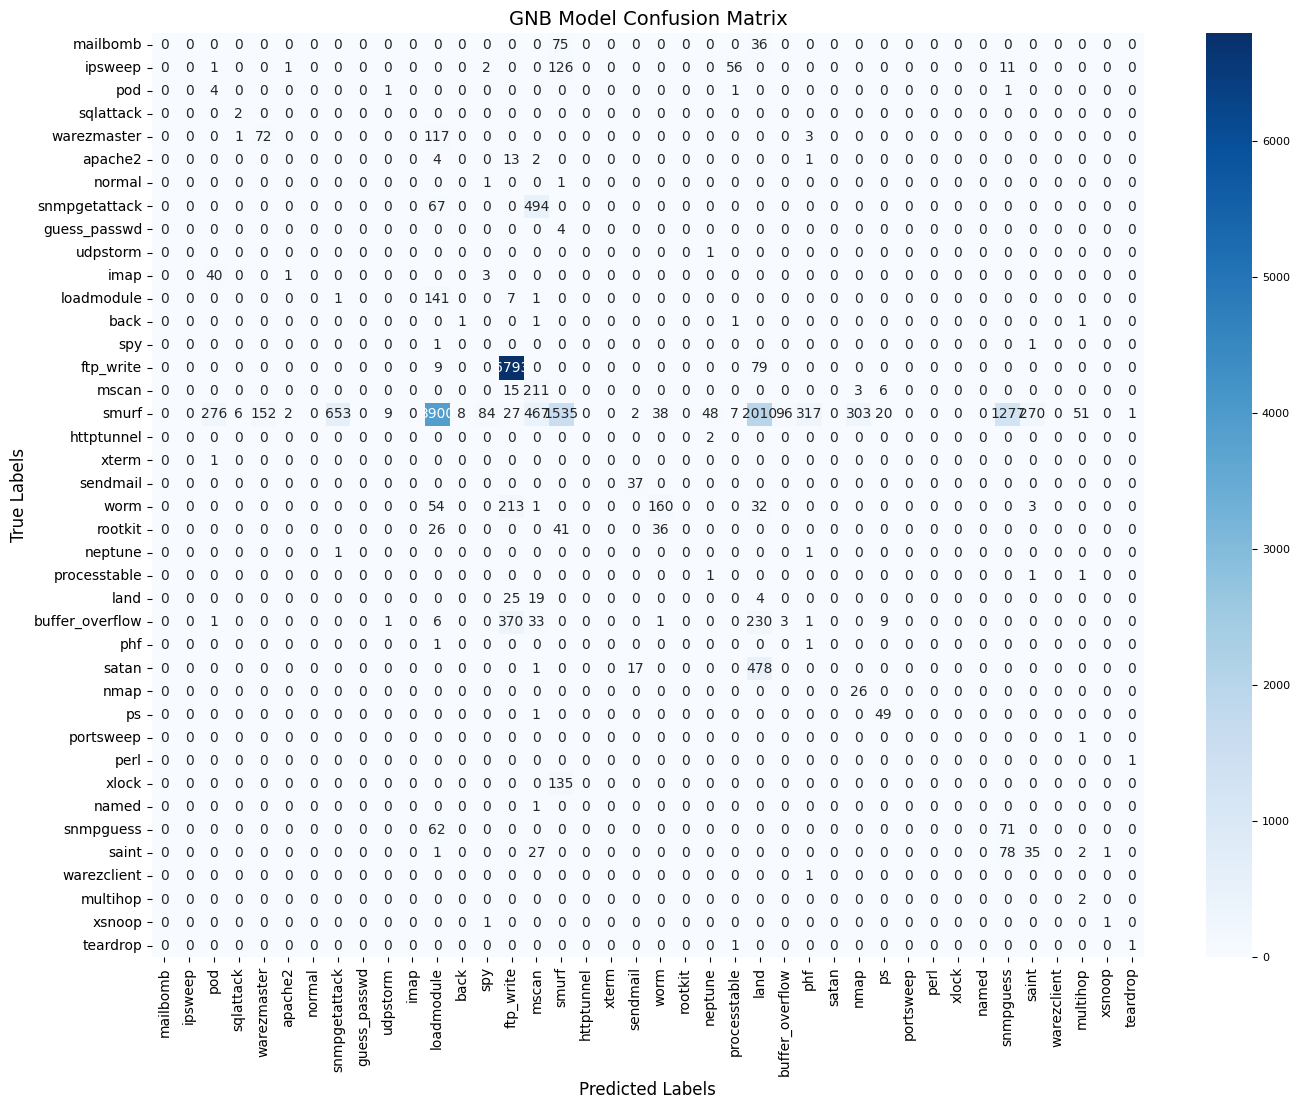

GNB Model Classification Report:
                 precision    recall  f1-score   support

       mailbomb       0.00      0.00      0.00       111
        ipsweep       0.00      0.00      0.00       197
            pod       0.01      0.57      0.02         7
      sqlattack       0.22      1.00      0.36         2
    warezmaster       0.32      0.37      0.35       193
        apache2       0.00      0.00      0.00        20
         normal       0.00      0.00      0.00         2
  snmpgetattack       0.00      0.00      0.00       561
   guess_passwd       0.00      0.00      0.00         4
       udpstorm       0.00      0.00      0.00         1
           imap       0.00      0.00      0.00        44
     loadmodule       0.03      0.94      0.06       150
           back       0.11      0.25      0.15         4
            spy       0.00      0.00      0.00         2
      ftp_write       0.91      0.99      0.95      6881
          mscan       0.17      0.90      0.28       2

/home/work/soyeong/alvy/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/work/soyeong/alvy/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/work/soyeong/alvy/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

def train_gnb(X_train, y_train, X_val, y_val, X_test, y_test):
    # Initialize GNB classifier
    gnb_model = GaussianNB()
    gnb_model.fit(X_train, y_train)
    
    # Predict on validation and test sets
    val_predictions = gnb_model.predict(X_val)
    test_predictions = gnb_model.predict(X_test)
    
    # Calculate and print accuracy
    val_accuracy = accuracy_score(y_val, val_predictions)
    test_accuracy = accuracy_score(y_test, test_predictions)
    print(f"Validation Accuracy: {val_accuracy:.6f}")
    print(f"Test Accuracy: {test_accuracy:.6f}")
    
    return test_accuracy, y_test, test_predictions

# Train the model and get predictions
meta_accuracy, y_meta_test, meta_predictions = train_gnb(X_train, y_train, X_val, y_val, X_test, y_test)

# Print test accuracy
print(f"GNB_accuracy: {meta_accuracy:.6f}")

# Confusion matrix
cm_meta = confusion_matrix(y_meta_test, meta_predictions)
plt.figure(figsize=(16, 12))
sns.heatmap(cm_meta, annot=True, fmt='g', cmap='Blues', xticklabels=labels, yticklabels=labels, annot_kws={"size": 10})
plt.title("GNB Model Confusion Matrix", fontsize=14)
plt.xlabel('Predicted Labels', fontsize=12)
plt.ylabel('True Labels', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)  
plt.show()

# Classification report
print("GNB Model Classification Report:")
print(classification_report(y_meta_test, meta_predictions, target_names=labels))


Validation Accuracy: 0.944487
Test Accuracy: 0.944397
LR_accuracy: 0.944397


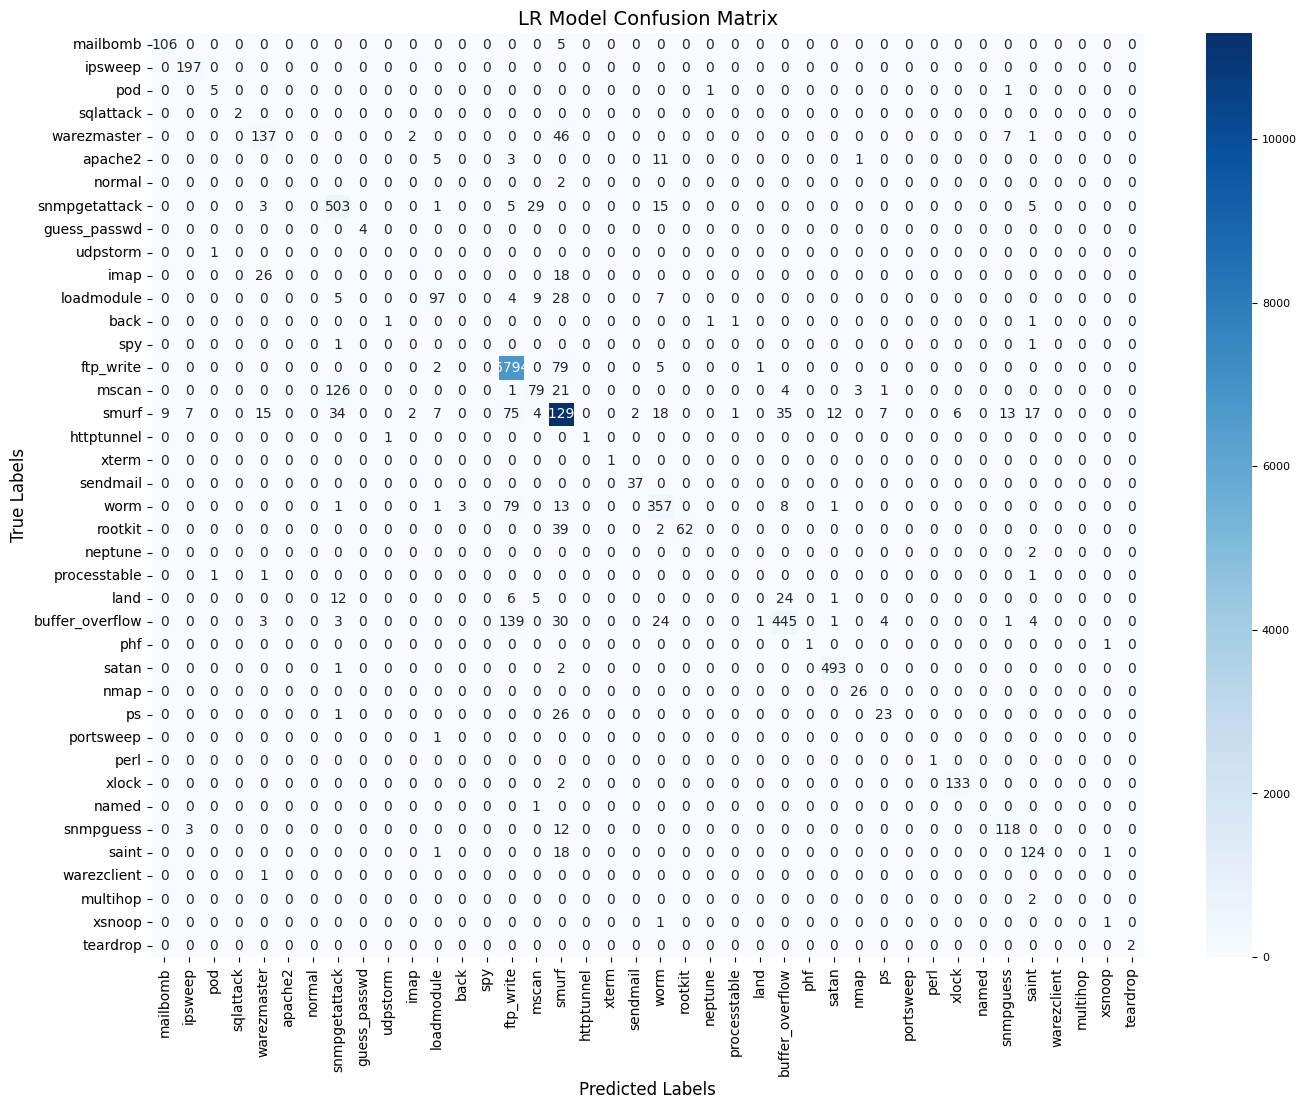

LR Model Classification Report:
                 precision    recall  f1-score   support

       mailbomb       0.92      0.95      0.94       111
        ipsweep       0.95      1.00      0.98       197
            pod       0.71      0.71      0.71         7
      sqlattack       1.00      1.00      1.00         2
    warezmaster       0.74      0.71      0.72       193
        apache2       0.00      0.00      0.00        20
         normal       0.00      0.00      0.00         2
  snmpgetattack       0.73      0.90      0.81       561
   guess_passwd       1.00      1.00      1.00         4
       udpstorm       0.00      0.00      0.00         1
           imap       0.00      0.00      0.00        44
     loadmodule       0.84      0.65      0.73       150
           back       0.00      0.00      0.00         4
            spy       0.00      0.00      0.00         2
      ftp_write       0.96      0.99      0.97      6881
          mscan       0.62      0.34      0.44       23

/home/work/soyeong/alvy/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/work/soyeong/alvy/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/work/soyeong/alvy/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

def train_lr(X_train, y_train, X_val, y_val, X_test, y_test):
    # Initialize Logistic Regression model
    lr_model = LogisticRegression(max_iter=1000, random_state=42)
    lr_model.fit(X_train, y_train)
    
    # Predict on validation and test sets
    val_predictions = lr_model.predict(X_val)
    test_predictions = lr_model.predict(X_test)
    
    # Calculate and print accuracy
    val_accuracy = accuracy_score(y_val, val_predictions)
    test_accuracy = accuracy_score(y_test, test_predictions)
    print(f"Validation Accuracy: {val_accuracy:.6f}")
    print(f"Test Accuracy: {test_accuracy:.6f}")
    
    return test_accuracy, y_test, test_predictions

# Train the model and get predictions
meta_accuracy, y_meta_test, meta_predictions = train_lr(X_train, y_train, X_val, y_val, X_test, y_test)

# Print test accuracy
print(f"LR_accuracy: {meta_accuracy:.6f}")

# Confusion matrix
cm_meta = confusion_matrix(y_meta_test, meta_predictions)
plt.figure(figsize=(16, 12))
sns.heatmap(cm_meta, annot=True, fmt='g', cmap='Blues', xticklabels=labels, yticklabels=labels, annot_kws={"size": 10})
plt.title("LR Model Confusion Matrix", fontsize=14)
plt.xlabel('Predicted Labels', fontsize=12)
plt.ylabel('True Labels', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)  
plt.show()

# Classification report
print("LR Model Classification Report:")
print(classification_report(y_meta_test, meta_predictions, target_names=labels))


Validation Accuracy: 0.871651
Test Accuracy: 0.866311
RidgeClassifier_accuracy: 0.866311


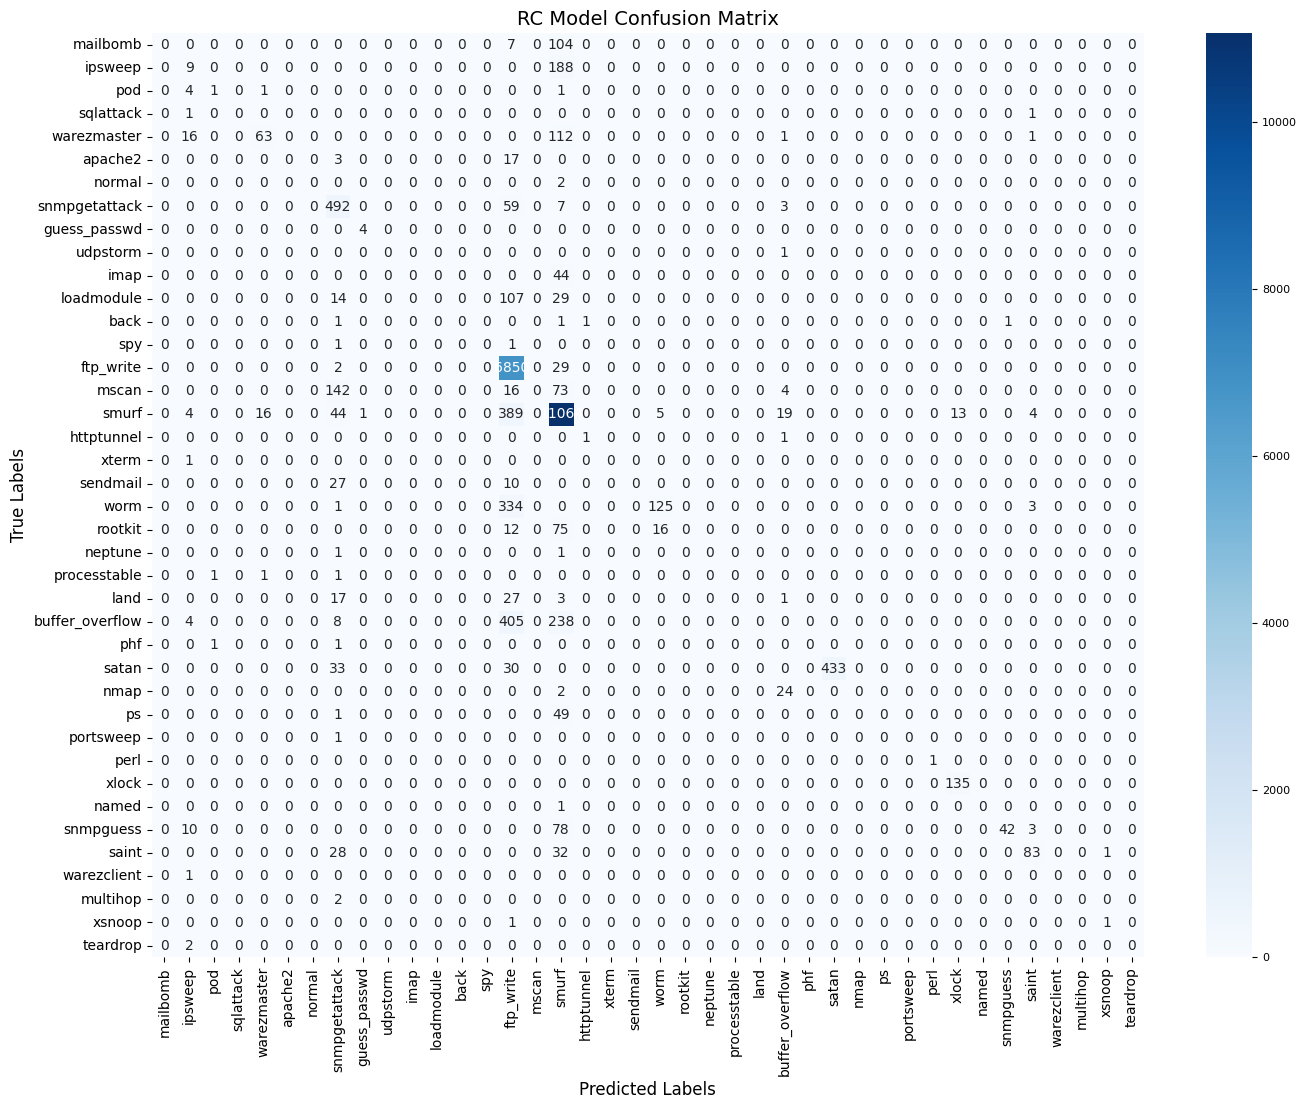

RC Model Classification Report:
                 precision    recall  f1-score   support

       mailbomb       0.00      0.00      0.00       111
        ipsweep       0.17      0.05      0.07       197
            pod       0.33      0.14      0.20         7
      sqlattack       0.00      0.00      0.00         2
    warezmaster       0.78      0.33      0.46       193
        apache2       0.00      0.00      0.00        20
         normal       0.00      0.00      0.00         2
  snmpgetattack       0.60      0.88      0.71       561
   guess_passwd       0.80      1.00      0.89         4
       udpstorm       0.00      0.00      0.00         1
           imap       0.00      0.00      0.00        44
     loadmodule       0.00      0.00      0.00       150
           back       0.00      0.00      0.00         4
            spy       0.00      0.00      0.00         2
      ftp_write       0.83      1.00      0.90      6881
          mscan       0.00      0.00      0.00       23

/home/work/soyeong/alvy/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/work/soyeong/alvy/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/work/soyeong/alvy/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

def train_ridge(X_train, y_train, X_val, y_val, X_test, y_test):
    # Initialize Ridge Classifier
    ridge_model = RidgeClassifier(random_state=42)
    ridge_model.fit(X_train, y_train)
    
    # Predict on validation and test sets
    val_predictions = ridge_model.predict(X_val)
    test_predictions = ridge_model.predict(X_test)
    
    # Calculate and print accuracy
    val_accuracy = accuracy_score(y_val, val_predictions)
    test_accuracy = accuracy_score(y_test, test_predictions)
    print(f"Validation Accuracy: {val_accuracy:.6f}")
    print(f"Test Accuracy: {test_accuracy:.6f}")
    
    return test_accuracy, y_test, test_predictions

# Train the model and get predictions
meta_accuracy, y_meta_test, meta_predictions = train_ridge(X_train, y_train, X_val, y_val, X_test, y_test)

# Print test accuracy
print(f"RidgeClassifier_accuracy: {meta_accuracy:.6f}")

# Confusion matrix
cm_meta = confusion_matrix(y_meta_test, meta_predictions)
plt.figure(figsize=(16, 12))
sns.heatmap(cm_meta, annot=True, fmt='g', cmap='Blues', xticklabels=labels, yticklabels=labels, annot_kws={"size": 10})
plt.title("RC Model Confusion Matrix", fontsize=14)
plt.xlabel('Predicted Labels', fontsize=12)
plt.ylabel('True Labels', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)  
plt.show()

# Classification report
print("RC Model Classification Report:")
print(classification_report(y_meta_test, meta_predictions, target_names=labels))


In [ ]:
env_details, package_versions = get_environment_details()
display_environment_table(env_details, package_versions)



--- Environment Details ---
| Component         | Version                                      |
|:------------------|:---------------------------------------------|
| Python Version    | 3.10.12                                      |
| OS                | Linux                                        |
| OS Version        | #112-Ubuntu SMP Thu Feb 3 13:50:55 UTC 2022  |
| Processor         | x86_64                                       |
| Platform          | Linux-5.4.0-99-generic-x86_64-with-glibc2.35 |
| CPU Count         | 60                                           |
| GPU Device        | CUDA GPU                                     |
| CUDA Version      | 12.4                                         |
| Total Memory (GB) | 1007.52                                      |

--- Installed Packages ---
| Library    | Version       |
|:-----------|:--------------|
| numpy      | 1.26.4        |
| pandas     | 2.2.3         |
| tensorflow | 2.18.0        |
| torch      | 2.5.1+cu124   